In [32]:
import sys
import os
from pathlib import Path

src_path = Path.home() / "QuditEM" / "src"

src_path = src_path.resolve()
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))



In [33]:
from qudit_ops.operators import *
from qudit_ops.pcs_measurements import get_counts, plot_histogram
import cirq
import numpy as np

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Commutation Relations between X and Z gates of arbitrary dimension

In [6]:
commutation_relation = ZXcomm_rel(z=3,x=3,dim=6)
print(commutation_relation)

Z3_X3
[[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
X3_Z3
[[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j]]

 Z3_X3 = (-1+0j)*X3_Z3


## Testing ModAdd gates in arb dim

In [7]:
mod_shift = 5
dim = 6
qudit = cirq.LineQid(0,dimension = dim)
circuit = cirq.Circuit()

circuit.append(ModAdd(mod_shift,dim=6).on(qudit))
circuit.append(ModAdd(mod_shift,dim=6).on(qudit))
print(circuit)


0 (d=6): ───[+++++]───[+++++]───


In [8]:
sim = cirq.Simulator()
result = sim.simulate(circuit)
print(f"Final vector state (Expecting |{(2*mod_shift)%dim}>): {result.final_state_vector}")

Final vector state (Expecting |4>): [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


## Testing Z Gate on ququart or qudit

In [9]:
qudit1 = cirq.LineQid(0, dimension=4)
circ_z = cirq.Circuit()

circ_z.append(ModAdd(3,dim=4).on(qudit1))
circ_z.append(ZGate(3,dim=4).on(qudit1))
print(circ_z)


0 (d=4): ───[+++]───Z3───


In [10]:
result_z = sim.simulate(circ_z)
print(f"Final vector state after Z gate : {result_z.final_state_vector}")

Final vector state after Z gate : [0.+0.j 0.+0.j 0.+0.j 0.+1.j]


## Test3: Flip Gates on ququarts/qudits

In [11]:
qubit = cirq.LineQid(0,dimension=4)
circ_f = cirq.Circuit()
ini = 0
fin = 3
circ_f.append(FlipGate(ini,fin,dim=4).on(qubit))
print(circ_f)

0 (d=4): ───X(0,3)───


In [12]:
result_f = sim.simulate(circ_f)
print(f"Expected state vector (|{fin}>): {result_f.final_state_vector}")

Expected state vector (|3>): [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


## Controlled gates on qudit/ququarts

In [ ]:

qudits = cirq.LineQid.range(2,dimension=4)
circ_c = cirq.Circuit()
control = 3
target = 0
final = 2
circ_c.append(ModAdd(final,dim=4).on(qudits[0]))
circ_c.append(ModAdd(3,dim=4).on(qudits[1]))
circ_c.append(Chrestenson(dim=4).on(qudits[0]))
# circ_c.append(ModAdd(2,dim=4).on(qudits[1]))
circ_c.append(CModAdd(control,control,dim=4).on(qudits[1],qudits[0]))
print(circ_c)

0 (d=4): ───[++]────Cr───[+++]───
                         │
1 (d=4): ───[+++]────────(3)─────


In [14]:
sim = cirq.Simulator()
result_c = sim.simulate(circ_c)
print(f"Expected state vector |{control}{final}>: {result_c.final_state_vector}")

Expected state vector |32>: [ 0. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0.5-0.j
  0. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j]


## Generating maximally entangled state GHZ

In [15]:
qudits = cirq.LineQid.range(2,dimension=4)
circ = cirq.Circuit()
# circ.append(ModAdd(2,dim = 4).on(qudits[0]))
# circ.append(Christensen(dim = 4).on(qudits[0]))
# circ.append(FlipGate(1,3,dim=4).on(qudits[0]))
circ.append(Christensen(dim = 4).on(qudits[0]))
circ.append(CModAdd(1,1,dim=4).on(qudits[0],qudits[1]))
circ.append(CModAdd(2,2,dim=4).on(qudits[0],qudits[1]))
circ.append(CModAdd(3,3,dim=4).on(qudits[0],qudits[1]))
circ.append(cirq.measure(*qudits,key='a'))
print(circ)

0 (d=4): ───Cr───(1)───(2)────(3)─────M('a')───
                 │     │      │       │
1 (d=4): ────────[+]───[++]───[+++]───M────────


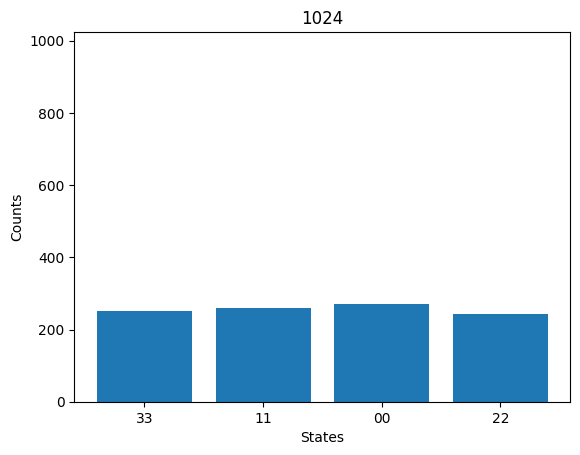

In [16]:

sim = cirq.Simulator()
result = sim.run(circ,repetitions=1024)
counts = get_counts(result,key='a')
plot_histogram(counts)


## Testing generalized Hadamard operations on ququarts

In [41]:
dims = 4
qid = cirq.LineQid(0,dimension=dims)
circuit = cirq.Circuit(

    ModAdd(1,dims).on(qid),
    Christensen(dim=4).on(qid),
    Christensen_dg(dim=4).on(qid)
    # Christensen(dim=dims).on(qid), ZGate(2,dims).on(qid), ZGate(4,dims).on(qid)
)
print((sim.simulate(circuit).final_state_vector))

[-0.+0.j  1.+0.j -0.+0.j  0.-0.j]


## Testing PCS operation on identity payload circuit

### Phase change (Z^1,Z^2,Z^3) errors

In [ ]:
#Testing generalized Chrestenson gate on ququarts
qudits2 = cirq.LineQid.range(2,dimension=4)
circuit_pcs = cirq.Circuit()
moment = cirq.Moment()
circuit_pcs.append(Chrestenson(dim=4).on(qudits2[1]))
circuit_pcs.append(CModAdd(3,3,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(CModAdd(1,1,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(CModAdd(2,2,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(ZGate(3,dim=4).on(qudits2[0]))
circuit_pcs.append(CModAdd(2,2,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(CModAdd(1,3,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(CModAdd(3,1,dim=4).on(qudits2[1],qudits2[0]))
circuit_pcs.append(Chrestenson_dg(dim=4).on(qudits2[1]))
circuit_pcs.append(cirq.measure(qudits2[1],key='b'))
print(circuit_pcs)
#cr_dg not cr

0 (d=4): ────────[+++]───[+]───[++]───Z3───[++]───[+++]───[+]──────────────────
                 │       │     │           │      │       │
1 (d=4): ───Cr───(3)─────(1)───(2)─────────(2)────(1)─────(3)───Cr†───M('b')───


In [19]:
sim = cirq.Simulator()
result = sim.run(circuit_pcs,repetitions = 100)
print(get_counts(result,key='b'))

{'3': 100}


In [20]:
qid_b = cirq.LineQid(0,dimension=4)
qid_a = cirq.LineQubit(1)
circuit1 = cirq.Circuit(
    cirq.H(qid_a),
    ModAdd(3,dim=4).on(qid_b).controlled_by(qid_a),
    ZGate(2,dim=4).on(qid_b),
    ModAdd(1,dim=4).on(qid_b).controlled_by(qid_a),
    cirq.H(qid_a),
    cirq.measure(qid_a,key='v')
)
print(circuit1)

0 (d=4): ───────[+++]───Z2───[+]────────────────
                │            │
1: ─────────H───@────────────@─────H───M('v')───


In [21]:
result = sim.run(circuit1,repetitions = 100)
print(get_counts(result,key='v'))

{'1': 100}


### Add errors

In [ ]:
qids = cirq.LineQid.range(2,dimension=4)
circ_x = cirq.Circuit(
    Chrestenson(dim=4).on(qids[1]),
    CZGate(c=3,power=2,dim=4).on(qids[1],qids[0]),
    CZGate(c=1,power=2,dim=4).on(qids[1],qids[0]),
    ModAdd(3,dim=4).on(qids[0]),
    CZGate(c=1,power=2,dim=4).on(qids[1],qids[0]),
    CZGate(c=3,power=2,dim=4).on(qids[1],qids[0]),
    Chrestenson_dg(dim=4).on(qids[1]),
    cirq.measure(qids,key='p')
)
print(circ_x)

0 (d=4): ────────Z2────Z2────[+++]───Z2────Z2──────────M('p')───
                 │     │             │     │           │
1 (d=4): ───Cr───(3)───(1)───────────(1)───(3)───Cr†───M────────


In [23]:
result = sim.run(circ_x,repetitions = 100)
print(get_counts(result,key='p'))

{'32': 100}


In [24]:
qid_b = cirq.LineQid(0,dimension=3)
qid_a = cirq.LineQubit(1)
circuit2 = cirq.Circuit(
    cirq.H(qid_a),
    ZGate(1,dim=3).on(qid_b).controlled_by(qid_a),
    ModAdd(2,dim=3).on(qid_b),
    ZGate(1,dim=3).on(qid_b).controlled_by(qid_a),
    cirq.H(qid_a),
    cirq.measure(qid_a,key="c")
)
print(circuit2)

0 (d=3): ───────Z───[++]───Z────────────────
                │          │
1: ─────────H───@──────────@───H───M('c')───


In [25]:
result = sim.run(circuit2,repetitions = 1000)
print(get_counts(result,key='c'))

{'1': 738, '0': 262}


### Applying pcs on error map using depolarizing channel in qutrits

In [39]:
qudits = cirq.LineQid.range(3,dimension=3)
circ = cirq.Circuit()
circ.append(Chrestenson(dim = 3).on(qudits[0]))
circ.append(CZGate(c=2,power=1,dim=3).on(qudits[0],qudits[1]))
circ.append(CZGate(c=1,power=2,dim=3).on(qudits[0],qudits[1]))

circ.append(ModAdd(1,dim=3).on(qudits[1]))

circ.append(CZGate(c=2,power=2,dim=3).on(qudits[0],qudits[1]))
circ.append(CZGate(c=1,power=1,dim=3).on(qudits[0],qudits[1]))
circ.append(Chrestenson_dg(dim=3).on(qudits[0]))
# circ.append(CModAdd(2,2,dim=3).on(qudits[0],qudits[1]))

circ.append(cirq.measure(qudits[:-1],key='k'))
print(circ)

0 (d=3): ───Cr───(2)───(1)─────────(2)───(1)───Cr†───M('k')───
                 │     │           │     │           │
1 (d=3): ────────Z─────Z2────[+]───Z2────Z───────────M────────


In [40]:
sim = cirq.Simulator()
result = cirq.DensityMatrixSimulator().run(circ, repetitions=1000)
print(get_counts(result,key='k'))

{'11': 1000}


In [28]:
qid = cirq.LineQid.range(2,dimension=4)
circuit = cirq.Circuit(
    CModAdd(3,3,dim=4).on(qid[0],qid[1]),
    # CModAdd(2,2,dim=4).on(qid[1],qid[0]),
    CModAdd(1,1,dim=4).on(qid[0],qid[1]),
)
circuit.append(cirq.measure(qid[0]))

print(circuit)
sim = cirq.Simulator()
result = sim.run(circuit,repetitions=10)
print(result)

0 (d=4): ───(3)─────(1)───M───
            │       │
1 (d=4): ───[+++]───[+]───────
q(0) (d=4)=0000000000


In [29]:
sim = cirq.Simulator()
result = sim.run(circuit,repetitions=10)
print(result)

q(0) (d=4)=0000000000
